# CAP 5768 - Data Science - Dr. Marques - Fall 2019

# Assignment 1: The Python data science stack 
## Solutions

### Goals 

- To get acquainted with Python and Jupyter notebooks.
- To acquire a basic understanding of the Python "data science stack" (NumPy, Pandas, Matplotlib).
- To have an early experience of manipulating, summarizing, and visualizing small datasets. 
- To demonstrate the ability to write Python code to answer questions and test hypotheses based on the contents of those datasets.


### Instructions

- This assignment is structured as a game, with three levels of increasing complexity.
- For each level, there will be some Python code to be written and questions to be answered.
- At the end, you should export your notebook to PDF format; it will "automagically" become your report.
- Submit the report (PDF), notebook (.ipynb file), and (optionally) link to the "live" version of your solution on Google Colaboratory via Canvas.
- The total number of points is 320 (plus up to 44 bonus points), distributed as follows: Level 1 (82 pts), Level 2 (70+ pts), Level 3 (132+ pts) and Conclusions (36 pts).

### Important

- It is OK to attempt the bonus points, but please **do not overdo it!** 
- Remember: this is an early exercise in exploring datasets; learning the syntax and "tricks" of Python, Jupyter notebooks, Numpy, Pandas, and Matplotlib; and writing code to test simple hypotheses and produce answers to simple questions that **you know you should be able to answer** because the answer can be pulled from the data.
- This is not (yet) the time to do sophisticated statistical analysis, train ML models, etc. 

------------
## Level 1: Presidents of the USA

The Python code below will load a dataset containing the names of the first 44 presidents of the USA and their heights, available in the file *president_heights.csv*, which is a simple comma-separated list of labels and values.

In [34]:
# Imports
import numpy as np
import pandas as pd
from pandas import DataFrame, Series

%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import seaborn as sns

from scipy.stats import pearsonr
from scipy import stats
from scipy.stats import norm

In [35]:
file = 'president_heights.csv'
president_heights_data = pd.read_csv(file) 
president_heights_data

,order,name,height(cm)
0,1,George Washington,189
1,2,John Adams,170
2,3,Thomas Jefferson,189
3,4,James Madison,163
4,5,James Monroe,183
5,6,John Quincy Adams,171
6,7,Andrew Jackson,185
7,8,Martin Van Buren,168
8,9,William Henry Harrison,173
9,10,John Tyler,183


## Your turn! (8 points)

Write code to display the histogram (4 pts) of president's heights and compute summary statistics (4 pts): 

- Mean height
- Standard deviation
- Minimum height, and 
- Maximum height.

## Solution

In [36]:
# Making numpyArray

president_heights_numpyArray = np.array(president_heights_data['height(cm)'])
print(president_heights_numpyArray)

[189 170 189 163 183 171 185 168 173 183 173 173 175 178 183 193 178 173
 174 183 183 168 170 178 182 180 183 178 182 188 175 179 183 193 182 183
 177 185 188 188 182 185]


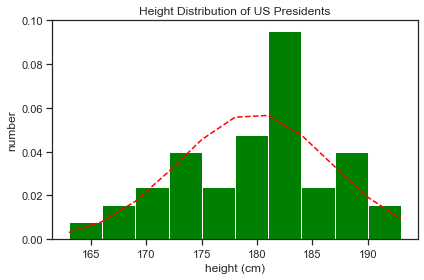

In [38]:
# Histogram 

fig, ax = plt.subplots()
n, bins, patches = ax.hist(president_heights_numpyArray, density=5, color='green')

# best fit of data
(mu, sigma) = norm.fit(president_heights_numpyArray)

y = ((1 / (np.sqrt(2 * np.pi) * sigma)) *
     np.exp(-0.5 * (1 / sigma * (bins - mu))**2))

# add a 'best fit' line
ax.plot(bins, y, 'r--')

# plotting Title
plt.title('Height Distribution of US Presidents')
plt.xlabel('height (cm)')
plt.ylabel('number')

# shwoing plot
fig.tight_layout()
plt.show()

In [39]:
# Mean height
print("Presidents Mean height:", np.mean(president_heights_numpyArray))

# Standard deviation
print("Presidents heights Standard Deviation:", np.std(president_heights_numpyArray))

# Minimum height
print("Presidents Minimum height:", np.min(president_heights_numpyArray))

# Maximum height
print("Presidents Maximum height:", np.max(president_heights_numpyArray))

Presidents Mean height: 179.73809523809524
Presidents heights Standard Deviation: 6.931843442745892
Presidents Minimum height: 163
Presidents Maximum height: 193


## Your turn! (18 points)

Write Python code to answer the following questions (make sure the messages displayed by your code are complete and descriptive enough):

1. Who was(were) the tallest president(s)?
2. Who was(were) the shortest president(s)?
3. How many presidents were 6' tall or taller?

## Solution

In [40]:
# Who was(were) the tallest president(s)?

df_new = president_heights_data[(president_heights_data['height(cm)']== 193) ]
print (df_new.name)

15      Abraham Lincoln
33    Lyndon B. Johnson
Name: name, dtype: object


In [41]:
# Who was(were) the shortest president(s)?

df_new = president_heights_data[(president_heights_data['height(cm)']==163) ]
print (df_new.name)

3    James Madison
Name: name, dtype: object


In [42]:
# How many presidents were 6' (or 182.88 cms) tall or taller (by using List comp)?

numbers =[i for i in president_heights_data['height(cm)'] if i >=182.88]
print("How many presidents were 6' tall or taller:", len(numbers))


How many presidents were 6' tall or taller: 18


-------------

This is an extremely small, simple and manageable dataset. 

Let's use it to prove a silly hypotheses, for example: 

"H1: Even-numbered presidents are, in average, taller than odd-numbered ones." 

## Your turn! (24 points)

Write Python code to test hypothesis H1.

## Solution

In [43]:
# Python code to test hypothesis H1
odd_president_heights_indices  = (president_heights_data['order']) %2 !=0
even_president_heights_indices = (president_heights_data['order']) %2  ==0

odd_president_heights_data  = (president_heights_data['height(cm)'][odd_president_heights_indices])
even_president_heights_data = (president_heights_data['height(cm)'][even_president_heights_indices])

ttest,pval = stats.ttest_ind(odd_president_heights_data, even_president_heights_data)
print("p-value is:", pval)
if pval<0.05:
    print("reject null hypothesis")
else:
    print("accept null hypothesis")

p-value is: 0.9049618398198883
accept null hypothesis


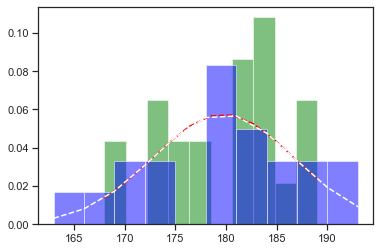

In [44]:
fig, ax = plt.subplots()
n, bins, patches = ax.hist(odd_president_heights_data,  alpha=0.5, density=5, color='green')
y = ((1 / (np.sqrt(2 * np.pi) * sigma)) *
     np.exp(-0.5 * (1 / sigma * (bins - mu))**2))

ax.plot(bins, y, 'r--')

n, bins, patches = ax.hist(even_president_heights_data,  alpha=0.5, density=5, color='blue')
y1 = ((1 / (np.sqrt(2 * np.pi) * sigma)) *
     np.exp(-0.5 * (1 / sigma * (bins - mu))**2))

ax.plot(bins, y1, 'w--')


###### From the above plot, it is confirmed that we are accepting the null hypothesis. There are overlapping of two histograms (and their best fitting curve).

## Question 1 (4 points)

Was hypothesis H1 confirmed or refuted?

## Solution

###### H1 will be refuted because p-value is 0.9049618398198883 which is > 0.05 (if we set our rejection criteria at this point).

---------------------

Now it's time for you to come up with a different (but also silly) hypotheses, which we will call H2. **Be creative!**

###### H2: "Presidents with middle name will be taller, in average, than the presdents without middile name."  
       

## Your turn! (28 points)

Write Python code to test hypothesis H2 (and some text to explain whether it was confirmed or not).

## Solution

In [45]:
name = president_heights_data['name']
height = president_heights_data['height(cm)']

# Stroing indices for the prsedients those have middle name and those dont have.

middle_name=[]
no_middile_name=[]

for i in range (len(name)):
    j = name[i].split()
    if  len (j) >=3:
        middle_name.append(i)
    else:
        no_middile_name.append(i)

middle_president_heights_data = (president_heights_data['height(cm)'][middle_name])
no_middile__president_heights_data = (president_heights_data['height(cm)'][no_middile_name])
            
print ("Height of the President who has middle name:", middle_president_heights_data)
print ("Height of the President who does not havr middle name:", no_middile__president_heights_data)

Height of the President who has middle name: 5     171
7     168
8     173
10    173
17    173
18    174
19    183
20    183
24    182
26    183
29    188
30    175
31    179
32    183
33    193
38    188
40    182
Name: height(cm), dtype: int64
Height of the President who does not havr middle name: 0     189
1     170
2     189
3     163
4     183
6     185
9     183
11    173
12    175
13    178
14    183
15    193
16    178
21    168
22    170
23    178
25    180
27    178
28    182
34    182
35    183
36    177
37    185
39    188
41    185
Name: height(cm), dtype: int64


In [46]:
# Python code to test hypothesis H1
ttest,pval = stats.ttest_ind(middle_president_heights_data, no_middile__president_heights_data )
print("p-value is:", pval)
if pval<0.05:
    print("reject null hypothesis")
else:
    print("accept null hypothesis")

p-value is: 0.8414312170031042
accept null hypothesis


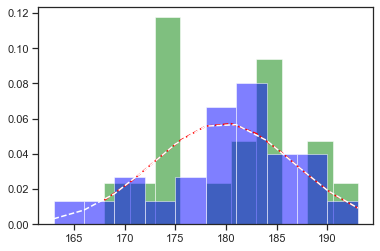

In [47]:
fig, ax = plt.subplots()
n, bins, patches = ax.hist(middle_president_heights_data,  alpha=0.5, density=5, color='green')
y = ((1 / (np.sqrt(2 * np.pi) * sigma)) *
     np.exp(-0.5 * (1 / sigma * (bins - mu))**2))

ax.plot(bins, y, 'r--')

n, bins, patches = ax.hist(no_middile__president_heights_data,  alpha=0.5, density=5, color='blue')
y1 = ((1 / (np.sqrt(2 * np.pi) * sigma)) *
     np.exp(-0.5 * (1 / sigma * (bins - mu))**2))

ax.plot(bins, y1, 'w--')


###### H1 will be refuted because p-value is 0.8414312170031042 which is > 0.05 (if we set our rejection criteria at this point)
##### From the above plot, it is confirmed that we are accepting the null hypothesis. There are overlapping of two histograms (and their best fitting curve).

-------------------
## Level 2: HR payroll

The Python code below will load a dataset containing the salaries and demographic data of more than 1000 employees of a hypothetical company, available in the file *salaries.csv*, which is a simple comma-separated list of labels and values.

In [48]:
salaries = pd.read_csv('salaries.csv') 
print(salaries.shape)
print(salaries.count())

(1192, 6)
earn      1192
height    1192
sex       1192
ed        1192
age       1192
race      1192
dtype: int64


## Question 2 (6 points)

What is the meaning of each of the six variables/features stored along the columns of the dataset?

## Solution

|Variables|Meaning|
|---------|------|
|earn (Ernings)|Neumercal  |
|height (in inches)  |Neumercal  |
|sex (M/F)  |Catagorical  |
|ed  (Education)  |Neumerical  |
|age|Neumerical|
|race | Catagorical|



##### Please see the python codes below:
    float/int (earn, height, ed, age) means Nemerical data
    object (sex, race) means catagorical data
    
    

In [49]:
print (salaries.head())
print (salaries.dtypes)

      earn     height     sex  ed  age   race
0  50000.0  74.424439    male  16   45  white
1  60000.0  65.537543  female  16   58  white
2  30000.0  63.629198  female  16   29  white
3  50000.0  63.108562  female  16   91  other
4  51000.0  63.402484  female  17   39  white
earn      float64
height    float64
sex        object
ed          int64
age         int64
race       object
dtype: object


--------------------

Let's explore the dataset by plotting some graphs and displaying summary statistics. 

The code below should display:
- Min, max, average, and median salary (global)
- A histogram of salaries
- A scatterplot correlating salaries and years of education
- The (Pearson) correlation coefficient between the two variables.

This should help us get started.

In [51]:
# Min, max, average, and median salary (global)
salary = np.array(salaries['earn'])
print("Salary statistics")
print("Minimum salary (global):", np.min(salary))
print("Maximum salary (global):", np.max(salary))
print("Average salary (global):", np.mean(salary))
print("Median  salary (global):", np.median(salary))

Salary statistics
Minimum salary (global): 200.0
Maximum salary (global): 200000.0
Average salary (global): 23154.773489932886
Median  salary (global): 20000.0


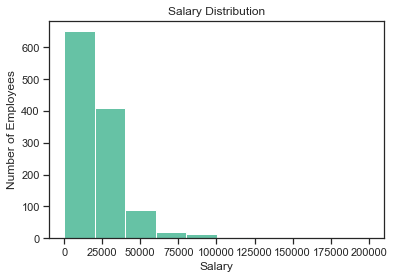

In [52]:
# A histogram of salaries

plt.hist(salary)
plt.title('Salary Distribution')
plt.xlabel('Salary')
plt.ylabel('Number of Employees');

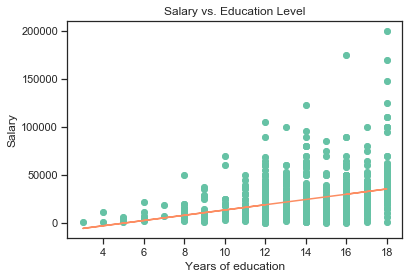

In [53]:
# A scatterplot correlating salaries and years of education

years = np.array(salaries['ed'])
plt.title('Salary vs. Education Level')
plt.xlabel('Years of education')
plt.ylabel('Salary');
plt.scatter(years, salary, alpha=0.5)

# Generated linear fit
slope, intercept, r_value, p_value, std_err = stats.linregress(years, salary)
line = slope*years+intercept
plt.plot(years, salary,'o', years, line)

plt.show()

In [54]:
#The (Pearson) correlation coefficient between the two variables.
# Compute Pearson coefficient
from scipy.stats import pearsonr
corr, _ = pearsonr(salary,years)
print('Correlation coefficient: ',corr)

Correlation coefficient:  0.33997652468948436


The Pearson correlation coefficient (a value between -1 and 1) can be used to summarize the strength of the linear relationship between two data samples.

A simplified way to interpret the result is:
- A value of 0 means no correlation
- Values below -0.5 or above 0.5 indicates a notable (negative/positive) correlation

## Your turn! (16+ points)

Write code to:

1. Display the total headcount and the number (and %) of male and female employees. (4 pts)
2. Compute and display the min, max, average, and median salary *per gender*. (12 pts)
3. (OPTIONAL) Plot meaningful graphs that could provide insight into the gender inequality (*if any is present*) associated with the salaries in the company. (<= 16 bonus points)


## Solution

In [55]:
# 1. Total headcount and the number (and %) of male and female employees.
subset = salaries['sex']
print("The total headcount of both male and female is:", len(subset))
print ("The number of headcount of male and female seperately: ", subset.value_counts())
print ("The number of headcount of male and female in percentage (%) : ", subset.value_counts(normalize=True) * 100)

The total headcount of both male and female is: 1192
The number of headcount of male and female seperately:  female    687
male      505
Name: sex, dtype: int64
The number of headcount of male and female in percentage (%) :  female    57.634228
male      42.365772
Name: sex, dtype: float64


In [56]:
# 2. The min, max, average, and median salary per gender. 
male=salaries.earn[salaries.sex=="male"]
print ("\n Males' Minimum salary: {},\n Males' Maximum salary: {}, \n Males' Average salary: {}, \n and, \n Males'Median salary: {}". format (male.min(), male.max(), male.mean(), male.median()))

female=salaries.earn[salaries.sex=="female"]
print ("\n Females' Minimum salary: {},\n Females' Maximum salary: {}, \n Females' Average salary: {}, \n and, \n Females'Median salary: {}". format (female.min(), female.max(), female.mean(), female.median()))


 Males' Minimum salary: 1000.0,
 Males' Maximum salary: 200000.0, 
 Males' Average salary: 29786.130693069306, 
 and, 
 Males'Median salary: 25000.0

 Females' Minimum salary: 200.0,
 Females' Maximum salary: 123000.0, 
 Females' Average salary: 18280.195050946142, 
 and, 
 Females'Median salary: 15000.0


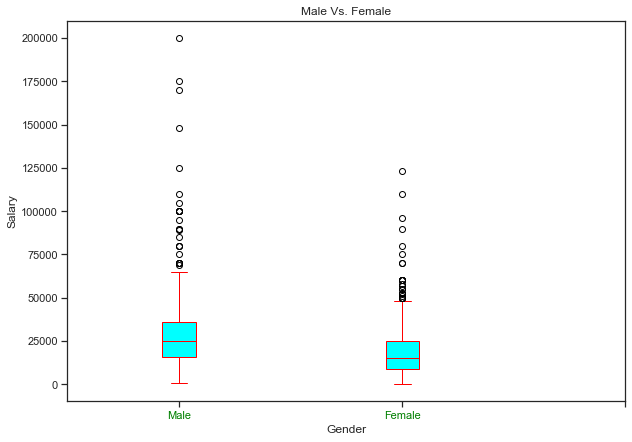

In [57]:
# 3. (optional) Box-plots to show the gender inequality associated with the salaries in the company:

data = [male, female]
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111)

def draw_plot(data, edge_color, fill_color):
    bp = ax.boxplot(data, patch_artist=True)

    for element in ['boxes', 'whiskers', 'fliers', 'means', 'medians', 'caps']:
        plt.setp(bp[element], color=edge_color)

    for patch in bp['boxes']:
        patch.set(facecolor=fill_color)     

draw_plot(data, 'red', 'cyan')

plt.title('Male Vs. Female')
plt.xlabel('Gender')
plt.ylabel('Salary')
plt.xticks([1, 2, 3], ['Male', 'Female'], color= 'green')
plt.show()

##### From the above graph, it is seen that average salaries for male is higher than the average salaries of female.
#### So, there is inequalities of salaries between the two genders.

--------------------

As you can possibly tell by now, this dataset may help us test hypotheses and answer questions related to possible sources of inequality associated with the salary distribution: gender, age, race, height. 

Let's assume, for the sake of argument, that the number of years of education should correlate well with a person's salary (this is clearly a weak argument and the plot and Pearson correlation coefficient computation above suggests that this is *not* the case) and that other suspiciously high (positive or negative) correlations could be interpreted as a sign of inequality.

---------------------

At this point, formulate 3 different hypotheses that might suggest that the salary distribution is biased by factors such as ageism. 

Call these hypotheses H3, H4, and H5. 

**Be creative, but realistic! These should be reasonable hypotheses, not silly ones!**

#### H3: "There is inequality of salaries across the age."

#### H4: "Young adults (50 years or less) gets more salaries, in average, than older people (more than 50 years old)."      
       
#### H5: "White people gets more salaries, in average, than other hispanic."

#### H6: "There is inequality of salaries, in average, between the two genders."
    
#### H7: "Heights with 6' or more gets more salaries, in average, than shorter heights."

#### H8: "Salary distribution is inequal across the heights (inches)."
    

## Your turn! (48+ points)

Write Python code to test hypotheses H3, H4, and H5 (and some text to explain whether they were confirmed or not). Feel free to (also) use plots, but make your code independent of a human being interpreting those plots. (16 pts per hypothesis with additional <= 8 bonus points per hypotheses).  

## Solution

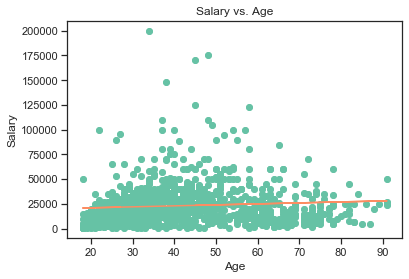

Correlation coefficient:  0.0810029736419061
p-value is: 2.525584802029883e-278
reject null hypothesis


In [58]:
# H3: "There is inequality of salaries across the age."

years = np.array(salaries['age'])
plt.title('Salary vs. Age')
plt.xlabel('Age')
plt.ylabel('Salary');
plt.scatter(years, salary, alpha=0.5)

# Generated linear fit
slope, intercept, r_value, p_value, std_err = stats.linregress(years, salary)
line = slope*years+intercept
plt.plot(years, salary,'o', years, line)

plt.show()

# Compute Pearson coefficient
from scipy.stats import pearsonr
corr, _ = pearsonr(years, salary)
print('Correlation coefficient: ',corr)

# Python code to test hypothesis H1
years = np.array(salaries['age'])
ttest,pval = stats.ttest_ind(years, salary)
print("p-value is:", pval)
if pval<0.05:
    print("reject null hypothesis")
else:
    print("accept null hypothesis")

#### The correlation is very week. So, we reject the null hypothesis. 
### So  there is no inequalty of salaries across the ages.

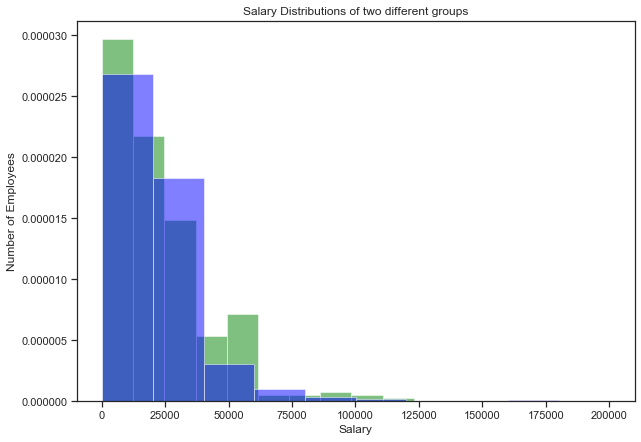

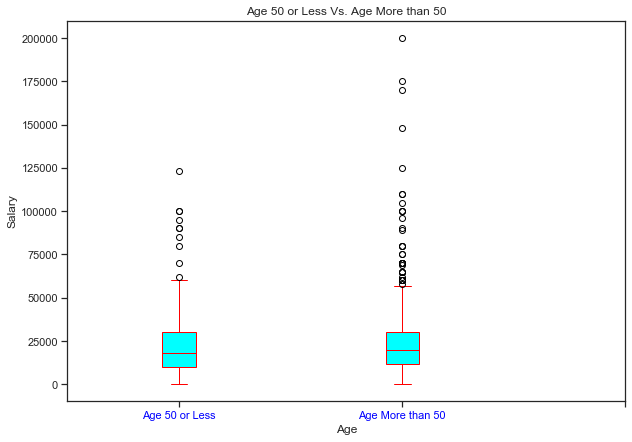

p-value is: 0.9694676099817894
accept null hypothesis


In [66]:
# H4: "Young adults (50 years or less) gets more salaries, in average, than older people (more than 50 years old)."

age50=np.array(salaries.earn[salaries.age >= 50])
agelessthan50=np.array(salaries.earn[salaries.age < 50])

# Generated Histograms: 

fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot()

n, bins, patches = ax.hist(age50,  alpha=0.5, density=5, color='green')

n, bins, patches = ax.hist(agelessthan50,  alpha=0.5, density=5, color='blue')

plt.title('Salary Distributions of two different groups')
plt.xlabel('Salary')
plt.ylabel('Number of Employees');

# Generated Box-plots:

data = [age50, agelessthan50]
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111)

def draw_plot(data, edge_color, fill_color):
    bp = ax.boxplot(data, patch_artist=True)

    for element in ['boxes', 'whiskers', 'fliers', 'means', 'medians', 'caps']:
        plt.setp(bp[element], color=edge_color)

    for patch in bp['boxes']:
        patch.set(facecolor=fill_color)     

draw_plot(data, 'red', 'cyan')

plt.title('Age 50 or Less Vs. Age More than 50')
plt.xlabel('Age')
plt.ylabel('Salary')
plt.xticks([1, 2, 3], ['Age 50 or Less', 'Age More than 50'], color= 'blue')
plt.show()

# Python code to test hypothesis H1

ttest,pval = stats.ttest_ind(age50, agelessthan50)
print("p-value is:", pval)
if pval<0.05:
    print("reject null hypothesis")
else:
    print("accept null hypothesis")

#### H1 will be refuted because p-value is 0.97 which is > 0.05. And, from the above histogram it is seen that there is ovelapping of both the plots. So, we can reject the null hypothesis. From the box-plots,it is seen that there is no difference of mean salaries bewteen the two groups of population. 
### So, there is no ineqaulitis between the two age grops.

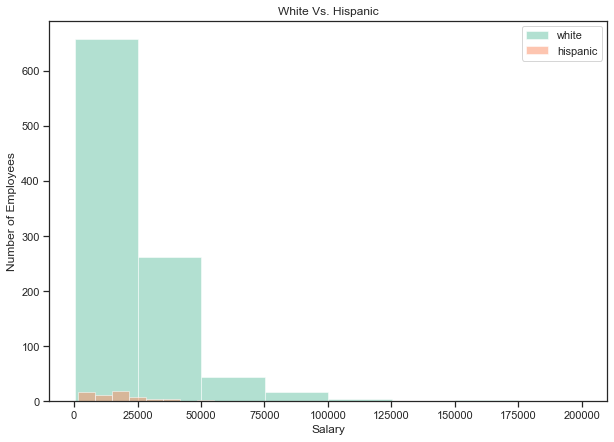

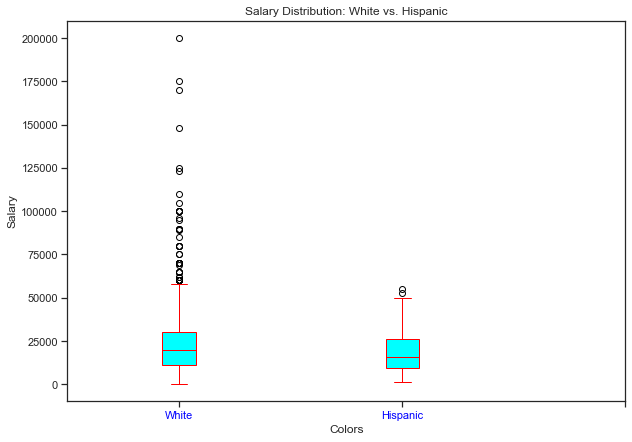

p-value is: 0.02726751209382369
reject null hypothesis


In [62]:
# H5: White people gets more salaries, in average, than other hispanic."

white = salaries.earn[salaries.race=="white"]
hispanic = salaries.earn[salaries.race=="hispanic"]
   
# Generated Histogram:
    
fig = plt.figure(figsize=(10, 7))

plt.title('White Vs. Hispanic')
plt.xlabel('Salary')
plt.ylabel('Number of Employees');

plt.hist(white, bins=8, alpha=0.5, label='white')
plt.hist(hispanic, bins=8, alpha=0.5, label='hispanic')
plt.legend(loc='upper right')

# Generated Box-plots:

data = [white, hispanic]
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111)

def draw_plot(data, edge_color, fill_color):
    bp = ax.boxplot(data, patch_artist=True)

    for element in ['boxes', 'whiskers', 'fliers', 'means', 'medians', 'caps']:
        plt.setp(bp[element], color=edge_color)

    for patch in bp['boxes']:
        patch.set(facecolor=fill_color)     

draw_plot(data, 'red', 'cyan')

plt.title('Salary Distribution: White vs. Hispanic')
plt.xlabel('Colors')
plt.ylabel('Salary')
plt.xticks([1, 2, 3], ['White', 'Hispanic'], color= 'blue')
plt.show()

# Python code to test hypothesis H1

ttest,pval = stats.ttest_ind(white, hispanic)
print("p-value is:", pval)
if pval<0.05:
    print("reject null hypothesis")
else:
    print("accept null hypothesis")

#### The above plots show that there is a difference in mean salaries between the two groups of population. So, we reject the null hypothesis.
#### p-value here <0.05.
### So, there is no ineqaulitis between the two colors.


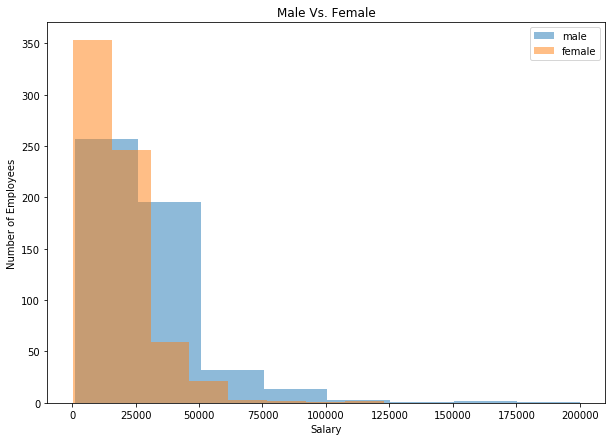

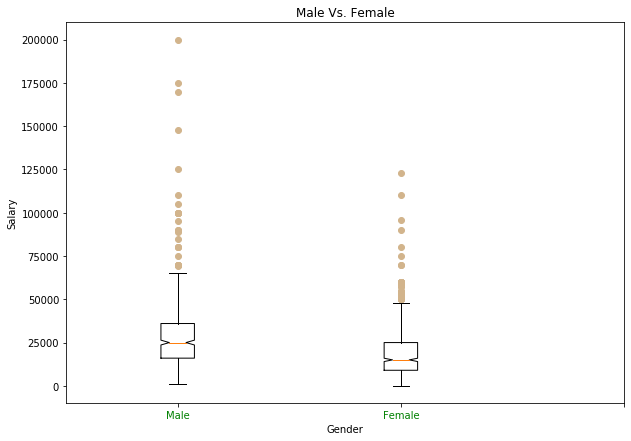

7.0605927759853905e-25
reject null hypothesis


In [64]:
# H6: "There is inequality of salaries, in average, between the two genders."

# Generated Histograms:  

fig = plt.figure(figsize=(10, 7))
plt.title('Male Vs. Female')
plt.xlabel('Salary')
plt.ylabel('Number of Employees');

plt.hist(male, bins=8, alpha=0.5, label='male')
plt.hist(female, bins=8, alpha=0.5, label='female')
plt.legend(loc='upper right')

# Generated Box-plots:

data_all = [male, female]

fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111)
bp = ax.boxplot(data_all, 'red', 'tan')
plt.title('Male Vs. Female')
plt.xlabel('Gender')
plt.ylabel('Salary')
plt.xticks([1, 2, 3], ['Male', 'Female'], color= 'green')
plt.show()

# Python code to test hypothesis H1
ttest,pval = stats.ttest_ind(male, female)
print(pval)
if pval<0.05:
    print("reject null hypothesis")
else:
    print("accept null hypothesis")

#### The above plots show that there is difference in mean between the two genders. So, we reject the null.

### So, there is no ineqaulitis between the two genders.

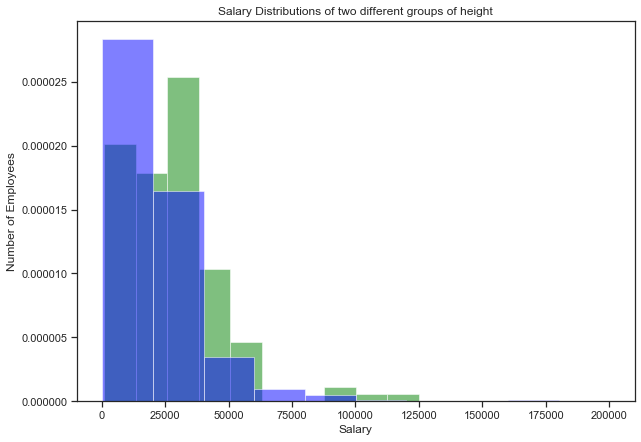

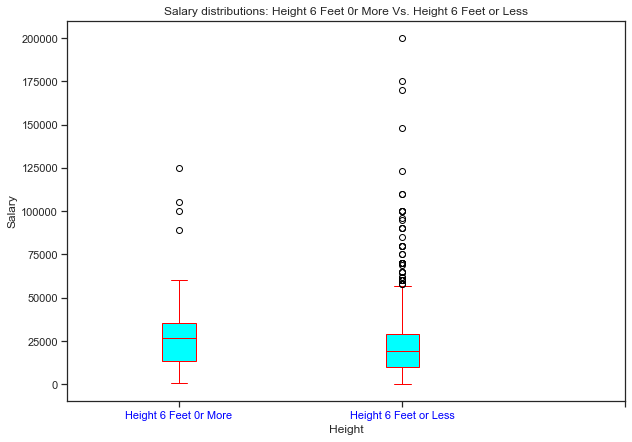

p-value is: 0.0029527710185519194
reject null hypothesis


In [68]:
# H7: "Heights with 6' (72") or more gets more salaries, in average, than shorter heights."

height6FeetOrMore=salaries.earn[salaries.height >= 72]
height6FeetOrLess=salaries.earn[salaries.height < 72]

# Generated Histograms: 

fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot()

n, bins, patches = ax.hist(height6FeetOrMore,  alpha=0.5, density=5, color='green')

n, bins, patches = ax.hist(height6FeetOrLess,  alpha=0.5, density=5, color='blue')

plt.title('Salary Distributions of two different groups of height')
plt.xlabel('Salary')
plt.ylabel('Number of Employees');

# Generated Box-plots:

data = [height6FeetOrMore, height6FeetOrLess]
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111)

def draw_plot(data, edge_color, fill_color):
    bp = ax.boxplot(data, patch_artist=True)

    for element in ['boxes', 'whiskers', 'fliers', 'means', 'medians', 'caps']:
        plt.setp(bp[element], color=edge_color)

    for patch in bp['boxes']:
        patch.set(facecolor=fill_color)     

draw_plot(data, 'red', 'cyan')

plt.title('Salary distributions: Height 6 Feet 0r More Vs. Height 6 Feet or Less')
plt.xlabel('Height')
plt.ylabel('Salary')
plt.xticks([1, 2, 3], ['Height 6 Feet 0r More',   'Height 6 Feet or Less'], color= 'blue')
plt.show()

# Python code to test hypothesis H1

ttest,pval = stats.ttest_ind(height6FeetOrMore, height6FeetOrLess)
print("p-value is:", pval)
if pval<0.05:
    print("reject null hypothesis")
else:
    print("accept null hypothesis")

#### The above plots show that there is difference in mean between the two height groups. So, we reject the null.
### So, there is no ineqaulitis between the two groups of height.

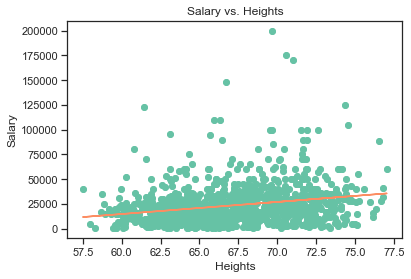

Correlation coefficient:  0.24184814953626707
p-value is: 7.500468934506857e-278
reject null hypothesis


In [71]:
# H8: "Salary distribution is inequal across the heights (inches)."

height = np.array(salaries['height'])
plt.title('Salary vs. Heights')
plt.xlabel('Heights')
plt.ylabel('Salary');
plt.scatter(height, salary, alpha=0.5)

# Generated linear fit
slope, intercept, r_value, p_value, std_err = stats.linregress(height, salary)
line = slope*height+intercept
plt.plot(height, salary,'o', height, line)

plt.show()

# Compute Pearson coefficient
from scipy.stats import pearsonr
corr, _ = pearsonr(height, salary)
print('Correlation coefficient: ',corr)

# Python code to test hypothesis H1
ttest,pval = stats.ttest_ind(height, salary)
print("p-value is:", pval)
if pval<0.05:
    print("reject null hypothesis")
else:
    print("accept null hypothesis")

#### The correlation is very week. So, we reject the null hypothesis. 
### So there is no inequalty of salaries across the heights.

-------------------
## Level 3: Fuel consumption

The Python code below will load a dataset containing fuel consumption data for ~400 vehicles produced in the 1970s and the 1980s along with some characteristic information associated with each model. 

Here, *displacement* refers to a vehicle's engine size and the fuel efficiency is measured in miles per gallon (mpg).

See:
https://archive.ics.uci.edu/ml/datasets/Auto+MPG for additional information.

In [76]:
sns.set(style='ticks', palette='Set2')
%matplotlib inline

data = pd.read_csv("http://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data-original",
                   delim_whitespace = True, header=None,
                   names = ['mpg', 'cylinders', 'displacement', 'horsepower', 'weight', 'acceleration',
                            'model', 'origin', 'car_name'])
print(data.shape)

(406, 9)


In [77]:
data.dropna(inplace=True)
data.head()


,mpg,cylinders,displacement,horsepower,weight,acceleration,model,origin,car_name
0,18.0,8.0,307.0,130.0,3504.0,12.0,70.0,1.0,chevrolet chevelle malibu
1,15.0,8.0,350.0,165.0,3693.0,11.5,70.0,1.0,buick skylark 320
2,18.0,8.0,318.0,150.0,3436.0,11.0,70.0,1.0,plymouth satellite
3,16.0,8.0,304.0,150.0,3433.0,12.0,70.0,1.0,amc rebel sst
4,17.0,8.0,302.0,140.0,3449.0,10.5,70.0,1.0,ford torino


## Question 3 (6 points)

What was the net effect of the line of code

``data.dropna(inplace=True)``?

In [78]:
print(data.shape)

(392, 9)


## Solution

#### Sometimes csv file has null values, which are later displayed as NaN in Data Frame. Pandas dropna() method 
#### allows the user to analyze and drop Rows/Columns with Null values. Here it drops (406-392)=14 rows which was displayed NaN.

## Your turn! (18+ points)

Write code to:

1. Count the number of 3- and 5-cylinder vehicles in the dataset, display the count, and discard those entries (rows). (12 pts)
2. Compute and display the min, max, and average fuel consumption (in mpg) for 4-, 6-, and 8-cylinder vehicles. (6 pts)
3. (OPTIONAL) Display the name of the most and least fuel efficient vehicles in the dataset (<= 4 points)


## Solution

In [79]:
# 1. Count the number of 3- and 5-cylinder vehicles in the dataset,display the count, and discard those entries (rows).

# Displaying where in data 3 and 5 cylinders vehicle are there:
cylinders =data.query('cylinders ==[3, 5]')
cylinders

,mpg,cylinders,displacement,horsepower,weight,acceleration,model,origin,car_name
78,19.0,3.0,70.0,97.0,2330.0,13.5,72.0,3.0,mazda rx2 coupe
118,18.0,3.0,70.0,90.0,2124.0,13.5,73.0,3.0,maxda rx3
250,21.5,3.0,80.0,110.0,2720.0,13.5,77.0,3.0,mazda rx-4
281,20.3,5.0,131.0,103.0,2830.0,15.9,78.0,2.0,audi 5000
304,25.4,5.0,183.0,77.0,3530.0,20.1,79.0,2.0,mercedes benz 300d
334,36.4,5.0,121.0,67.0,2950.0,19.9,80.0,2.0,audi 5000s (diesel)
341,23.7,3.0,70.0,100.0,2420.0,12.5,80.0,3.0,mazda rx-7 gs


In [80]:
three = data['cylinders'].where(data['cylinders'] == 3)
print ("Number of 3-cylinder vehicles in the dataset", three.count())

four = data['cylinders'].where(data['cylinders'] == 5)
print ("Number of 5-cylinder vehicles in the dataset", four.count())

Number of 3-cylinder vehicles in the dataset 4
Number of 5-cylinder vehicles in the dataset 3


In [82]:
# After discarding those entries.

# Discarding those entries (rows).
drop3= data[data.cylinders != 3]
new_data = drop3[drop3.cylinders !=5]

# Dispalying there are no columns in data set where 3- and 5-cylinders vehicle available.
new_data_query =new_data.query('cylinders ==[5]')
new_data_query

,mpg,cylinders,displacement,horsepower,weight,acceleration,model,origin,car_name


In [83]:
# 2.Compute and display the min, max, and average fuel consumption (in mpg) for 4-cylinder vehicles.

four_mean  =  new_data.mpg[new_data.cylinders == 4].mean()
four_max  =  new_data.mpg[new_data.cylinders == 4]. max()
four_min  =  new_data.mpg[new_data.cylinders == 4]. min()

print('The min, max, and average fuel consumption (in mpg) for 4-cylinder vehicles \nare respectively {}, {}. and {} ' . format (four_min, four_max, four_mean))

The min, max, and average fuel consumption (in mpg) for 4-cylinder vehicles 
are respectively 18.0, 46.6. and 29.283919597989957 


In [84]:
# 2.Compute and display the min, max, and average fuel consumption (in mpg) for 6-cylinder vehicles.

six_mean   =  new_data.mpg[new_data.cylinders == 6]. mean()
six_max    =  new_data.mpg[new_data.cylinders == 6]. max()
six_min    =  new_data.mpg[new_data.cylinders == 6]. min()

print('The min, max, and average fuel consumption (in mpg) for 6-cylinder vehicles \nare respectively {}, {}. and {} ' . format (six_min, six_max, six_mean))

The min, max, and average fuel consumption (in mpg) for 6-cylinder vehicles 
are respectively 15.0, 38.0. and 19.973493975903615 


In [85]:
# 2.Compute and display the min, max, and average fuel consumption (in mpg) for 8-cylinder vehicles.
eight_mean =  new_data.mpg[new_data.cylinders == 8]. mean()
eight_max  =  new_data.mpg[new_data.cylinders == 8]. max()
eight_min  =  new_data.mpg[new_data.cylinders == 8]. min()

print('The min, max, and average fuel consumption (in mpg) for 8-cylinder vehicles \nare respectively {}, {}. and {} ' . format (eight_min, eight_max, eight_mean))

The min, max, and average fuel consumption (in mpg) for 8-cylinder vehicles 
are respectively 9.0, 26.6. and 14.963106796116508 


In [86]:
# (OPTIONAL) Display the name of the most and least fuel efficient vehicles in the dataset.

car_min_mpg = new_data [['car_name','mpg']][new_data.mpg==new_data['mpg'].min()]
print (car_min_mpg)

car_max_mpg = new_data [['car_name','mpg']][new_data.mpg==new_data['mpg'].max()]
print (car_max_mpg)

    car_name  mpg
34  hi 1200d  9.0
      car_name   mpg
329  mazda glc  46.6


--------------------

This dataset may help us test hypotheses and answer questions related to fuel consumption. 

To get started: Which features of a vehicle correlate best with its mpg --  *displacement*, *weight*, or *horsepower*?

## Your turn! (48 points)

Write Python code to plot the relationship between:

1. Fuel consumption and displacement (engine size)
2. Fuel consumption and weight
3. Fuel consumption and horsepower (HP)


## Solution

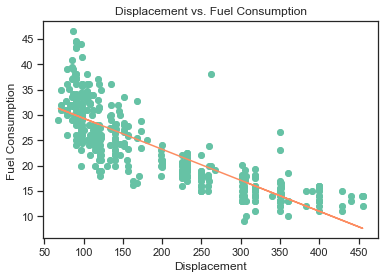

Correlation coefficient:  -0.8178873629400591


In [87]:
# 1. Fuel consumption and displacement (engine size)

mpg = np.array(new_data['mpg'])
displacement = np.array(new_data['displacement'])

plt.title('Displacement vs. Fuel Consumption')
plt.xlabel('Displacement')
plt.ylabel('Fuel Consumption ');
plt.scatter(displacement, mpg, alpha=0.5)

# Generated linear fit
slope, intercept, r_value, p_value, std_err = stats.linregress(displacement, mpg)
line = slope*displacement+intercept
plt.plot(displacement, mpg,'o', displacement, line)

plt.show()

# Compute Pearson coefficient
from scipy.stats import pearsonr
corr, _ = pearsonr(displacement, mpg)
print('Correlation coefficient: ',corr)

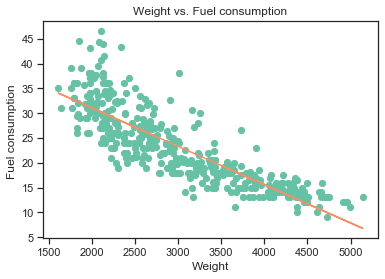

Correlation coefficient:  -0.8426809031318667


In [88]:
# 2. Fuel consumption and weight

mpg = np.array(new_data['mpg'])
weight = np.array(new_data['weight'])

plt.title('Weight vs. Fuel consumption')
plt.xlabel('Weight')
plt.ylabel('Fuel consumption ');
plt.scatter(weight, mpg, alpha=0.5)

# Generated linear fit
slope, intercept, r_value, p_value, std_err = stats.linregress(weight, mpg)
line = slope*weight+intercept
plt.plot(weight, mpg,'o', weight, line)

plt.show()

# Compute Pearson coefficient
from scipy.stats import pearsonr
corr, _ = pearsonr(weight, mpg)
print('Correlation coefficient: ',corr)

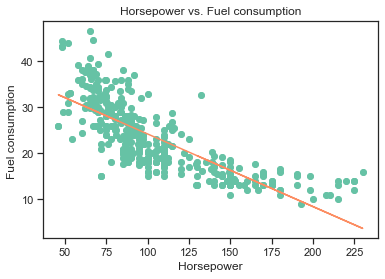

Correlation coefficient:  -0.7802588157322388


In [89]:
# 3. Fuel consumption and horsepower (HP)

mpg = np.array(new_data['mpg'])
horsepower = np.array(new_data['horsepower'])

plt.title('Horsepower vs. Fuel consumption')
plt.xlabel('Horsepower')
plt.ylabel('Fuel consumption ');
plt.scatter(horsepower, mpg, alpha=0.5)

# Generated linear fit
slope, intercept, r_value, p_value, std_err = stats.linregress(horsepower, mpg)
line = slope*horsepower+intercept
plt.plot(horsepower, mpg,'o',horsepower, line)

plt.show()

# Compute Pearson coefficient
from scipy.stats import pearsonr
corr, _ = pearsonr(horsepower, mpg)
print('Correlation coefficient: ',corr)

## Questions 4-6 (30 points, i.e. 10 points each)

For each of the three cases above, use the plots to answer the questions below:

4. Is there a correlation between mpg and displacement? If so: is it positive or negative? linear or non-linear?
5. Is there a correlation between mpg and weight? If so: is it positive or negative? linear or non-linear?
6. Is there a correlation between mpg and horsepower? If so: is it positive or negative? linear or non-linear?



## Solution

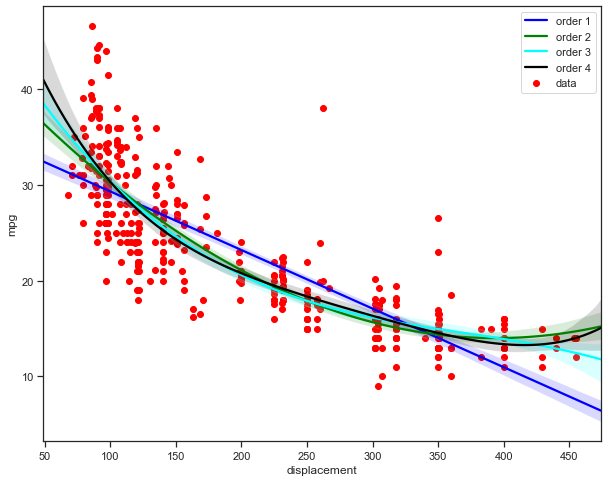

In [90]:
# 4. Is there a correlation between mpg and displacement? If so: is it positive or negative? linear or non-linear?

# Plot in blue a linear regression of order 1 between 'displacement' and 'mpg'
# Generate a scatter plot of 'weight' and 'mpg' using red circles

plt.figure(figsize=(10,8))
plt.scatter(new_data['displacement'], new_data['mpg'], label='data', color='red', marker='o')
sns.regplot(x='displacement', y='mpg', data=new_data, scatter=None, color='blue', label='order 1')
# Plot in green a linear regression of order 2 between 'weight' and 'mpg'
sns.regplot(x='displacement', y='mpg', data=new_data, scatter=None, order=2, color='green', label='order 2')
# Plot in green a linear regression of order 3 between 'weight' and 'mpg'
sns.regplot(x='displacement', y='mpg', data=new_data, scatter=None, order=3, color='cyan', label='order 3')
# Plot in green a linear regression of order 3 between 'weight' and 'mpg'
sns.regplot(x='displacement', y='mpg', data=new_data, scatter=None, order=4, color='black', label='order 4')


plt.legend(loc='upper right')

### Here it is negetive non-linear regression. This case polynomial form (order=3) is fitted well to the data.

#### order=1: Linear form of expression.
#### order=2: polynomial form of a quadratic expression (parabolic curve)
#### order=3: polynomial form of a cubic expression 
#### order=4: polynomial form od a quartic expression. 

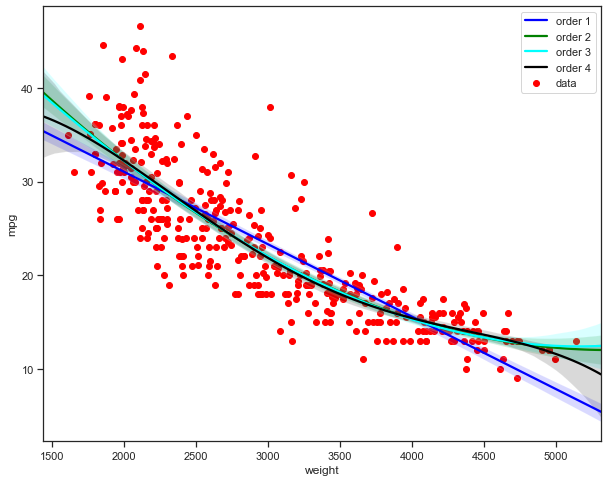

In [91]:
# 5. Is there a correlation between mpg and weight? If so: is it positive or negative? linear or non-linear?

# Plot in blue a linear regression of order 1 between 'weight' and 'mpg'
# Generate a scatter plot of 'weight' and 'mpg' using red circles

plt.figure(figsize=(10,8))
plt.scatter(new_data['weight'], new_data['mpg'], label='data', color='red', marker='o')
sns.regplot(x='weight', y='mpg', data=new_data, scatter=None, color='blue', label='order 1')
# Plot in green a linear regression of order 2 between 'weight' and 'mpg'
sns.regplot(x='weight', y='mpg', data=new_data, scatter=None, order=2, color='green', label='order 2')
# Plot in green a linear regression of order 3 between 'weight' and 'mpg'
sns.regplot(x='weight', y='mpg', data=new_data, scatter=None, order=3, color='cyan', label='order 3')
# Plot in green a linear regression of order 4 between 'weight' and 'mpg'
sns.regplot(x='weight', y='mpg', data=new_data, scatter=None, order=4, color='black', label='order 4')

plt.legend(loc='upper right')

### Here it is negetive non-linear regression. This case polynomial form (order=2, or 3) is fitted well to the data.
#### order=1: Linear form of expression.
#### order=2: polynomial form of a quadratic expression (parabolic curve)
#### order=3: polynomial form of a cubic expression
#### order=4: polynomial form od a quartic expression.

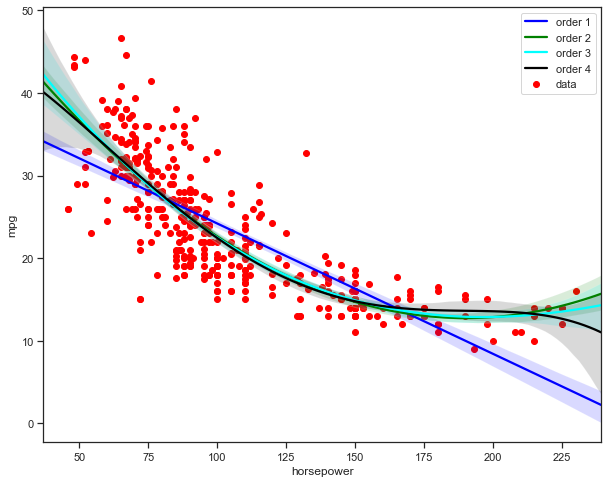

In [92]:
# 6. Is there a correlation between mpg and horsepower? If so: is it positive or negative? linear or non-linear?

# Plot in blue a linear regression of order 1 between 'weight' and 'mpg'
# Generate a scatter plot of 'weight' and 'mpg' using red circles

plt.figure(figsize=(10,8))
plt.scatter(new_data['horsepower'], new_data['mpg'], label='data', color='red', marker='o')
sns.regplot(x='horsepower', y='mpg', data=new_data, scatter=None, color='blue', label='order 1')
# Plot in green a linear regression of order 2 between 'weight' and 'mpg'
sns.regplot(x='horsepower', y='mpg', data=new_data, scatter=None, order=2, color='green', label='order 2')
# Plot in green a linear regression of order 3 between 'weight' and 'mpg'
sns.regplot(x='horsepower', y='mpg', data=new_data, scatter=None, order=3, color='cyan', label='order 3')
# Plot in green a linear regression of order 4 between 'weight' and 'mpg'
sns.regplot(x='horsepower', y='mpg', data=new_data, scatter=None, order=4, color='black', label='order 4')

plt.legend(loc='upper right')

### Here it is negetive non-linear regression. This case polynomial form (order=2, or 3) is fitted well to the data.
#### order=1: Linear form of expression.
#### order=2: polynomial form of a quadratic expression (parabolic curve)
#### order=3: polynomial form of a cubic expression
#### order=4: polynomial form od a quartic expression.

## Questions 7-8 (30 points, i.e. 15 points each)

Write Python code to produce (box)plots that should provide good answers the questions below:

7. Did vehicles get more efficient over the years (represented in this dataset, i.e., 1970 through 1982)?
8. Are Japanese cars more fuel efficient than American or European ones?

Hint: 

``data['Country_code'] = data.origin.replace([1,2,3],['USA','Europe','Japan'])``



## Solution

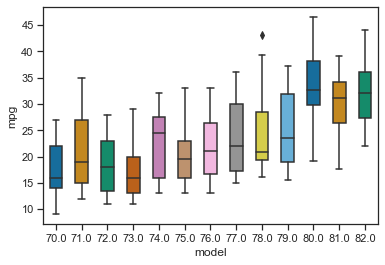

In [93]:
# 7.Did vehicles get more efficient over the years (represented in this dataset, i.e., 1970 through 1982)?

bplot = sns.boxplot(y='mpg', x='model', 
                 data=new_data, 
                 width=0.5,
                 palette="colorblind")

##### From the above plot it is seen that vehicles get more efficient over the years.

C:\Users\Debarshi\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


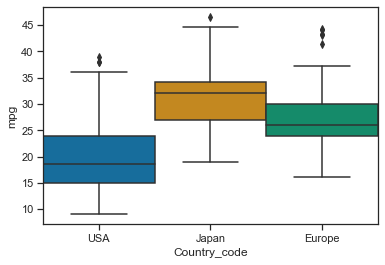

In [94]:
# 8. Are Japanese cars more fuel efficient than American or European ones?

new_data['Country_code'] = new_data.origin.replace([1,2,3],['USA','Europe','Japan'])
bplot = sns.boxplot(y='mpg', x=new_data['Country_code'], 
                 data=new_data, 
                 width=1,
                 palette="colorblind")

##### Ye, Japanese cars more fuel efficient than American or European ones.

## Conclusions (36 points)

Write your conclusions and make sure to address the issues below:
- What have you learned from this assignment?
- Which parts were the most fun, time-consuming, enlightening, tedious?
- What would you do if you had an additional week to work on this?

## Solution

#### What have you learned from this assignment?
I though completed Udemy course on Python, but I have not still done any  long python exercise. This is the very first time I did data science exercise. I learned a lot of NumPy, Pandas, and Matplotlib application on data augmentation, manipulation, visualization, etc. 
#### Which parts were the most fun, time-consuming, enlightening, tedious?
I enjoyed this assignment throughout. However, It is time-consuming. I could not say it is tedious, but I would always mention that I have walked through rough road sometimes while solving this problem. Yes, at this point I could say that I did overdo many parts (building hypythesis, and making plots) out of fun despite having my tedious research works.
#### What would you do if you had an additional week to work on this?
Though I tried to solve the same problems in a different way, I would again have tried to solve the problems in a different way if I have an additional week to work this assignment.
